In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.shape

(541909, 8)

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data preprocessing

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
100*data.isnull().sum()/len(data)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data["CustomerID"] = data["CustomerID"].astype(str)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [12]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

### Data cleaning

In [13]:
data["amount"]=data["UnitPrice"]*data["Quantity"]

In [14]:
data_amount =data.groupby('CustomerID')["amount"].sum()
data_amount = data_amount.reset_index()
data_amount

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [15]:
data_f = data.groupby("CustomerID")["InvoiceDate"].count()
data_f = data_f.reset_index()
data_f.columns = ["CustomerID","freequency"]
data_f.head(5)

,CustomerID,freequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [16]:
data_merge = pd.merge(data_f,data_amount,how="inner",on="CustomerID")
data_merge.head()

,CustomerID,freequency,amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [18]:
max_date =max(data['InvoiceDate'])

In [19]:
max_date

Timestamp('2011-12-09 12:50:00')

In [20]:
data["datediff"] = max_date - data["InvoiceDate"]

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,datediff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [22]:
# last transaction 
data_lat = data.groupby("CustomerID")["datediff"].min().dt.days
data_lat = data_lat.reset_index()
data_lat.head()

,CustomerID,datediff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [23]:
f_data = pd.merge(data_lat,data_merge,how="inner",on="CustomerID")
f_data.head()

,CustomerID,datediff,freequency,amount
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


Text(0.5, 0, 'Attributes')

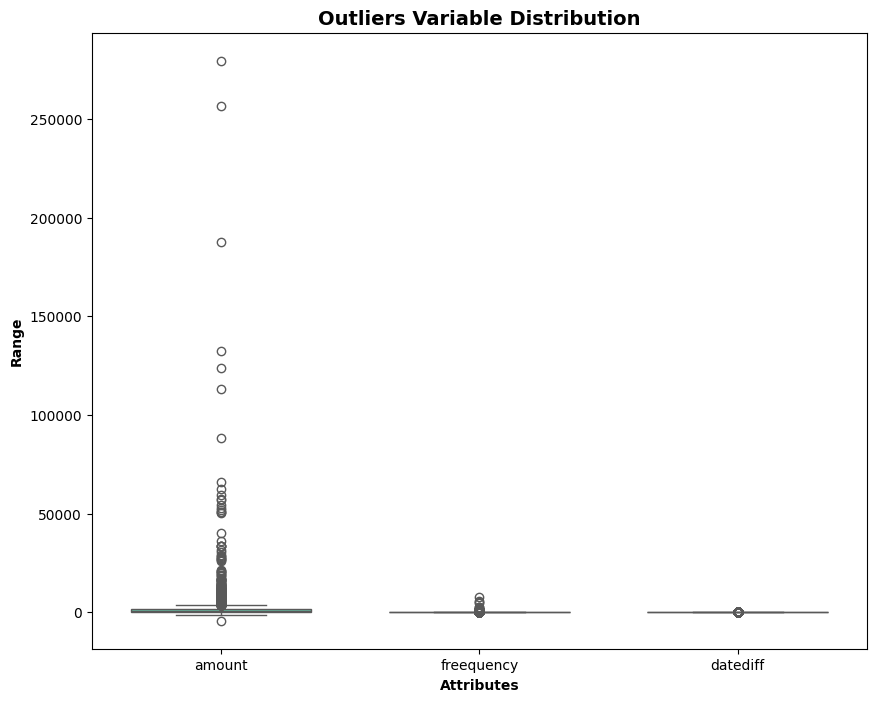

In [24]:
attributes = ['amount','freequency','datediff']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = f_data[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [25]:
def filter_outliers(df, columns):
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

filtered_data = filter_outliers(f_data, ['amount', 'datediff', 'freequency'])


In [26]:
filtered_data.shape

(3629, 4)

<Axes: >

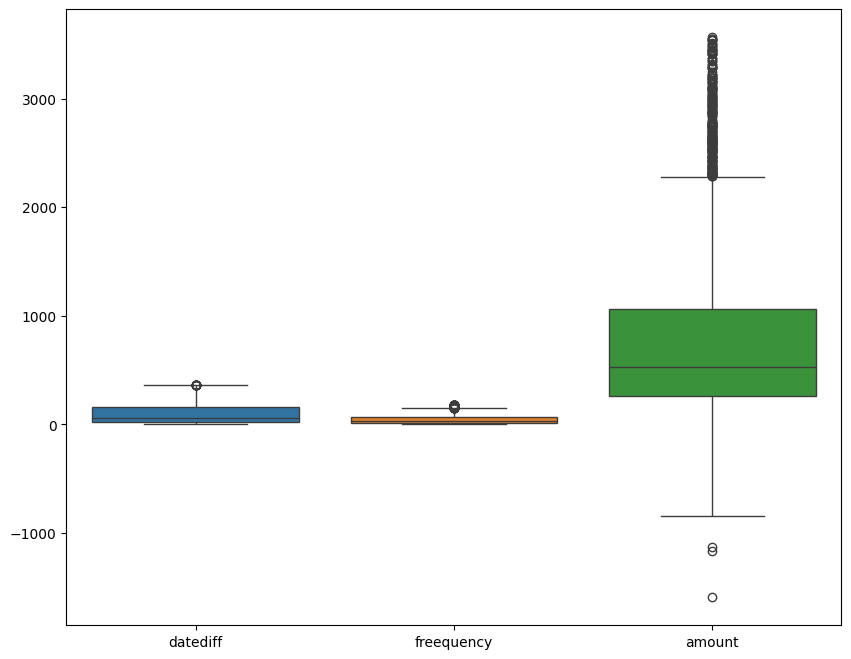

In [27]:
sns.boxplot(filtered_data)

In [28]:
df  = filtered_data[["amount","freequency","datediff"]]
scaler = StandardScaler()
df_sc  =scaler.fit_transform(df)
df_sc.shape

(3629, 3)

In [29]:
df1 = pd.DataFrame(df_sc)
df1.columns = ["amount","freequency","datediff"]
df1.head()

,amount,freequency,datediff
0,-1.056277,-1.076164,2.351537
1,1.355840,-0.393805,-0.239067
2,1.302571,0.594439,-0.817050
3,-0.607471,-0.723220,2.186399
4,1.017853,1.112091,-0.641591


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amount      3629 non-null   float64
 1   freequency  3629 non-null   float64
 2   datediff    3629 non-null   float64
dtypes: float64(3)
memory usage: 85.2 KB


In [31]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8,max_iter=40)
kmean.fit(df1)


KMeans(max_iter=40)

In [32]:
kmean.labels_

array([2, 5, 1, ..., 6, 3, 1], shape=(3629,), dtype=int32)

In [33]:
for i in range (0, 10):
    print(i)


0
1
2
3
4
5
6
7
8
9


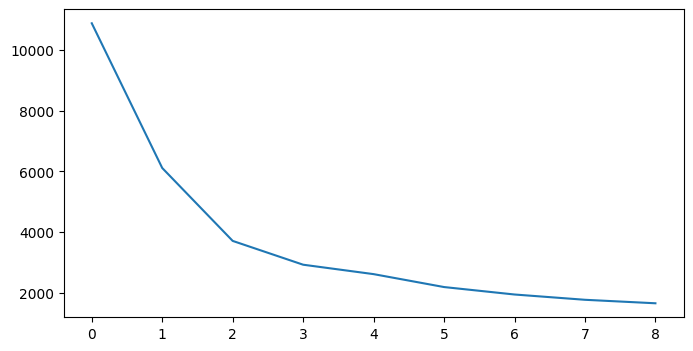

In [34]:
plt.figure(figsize=(8,4))
elbow =[]
for nmb_clustters in range (1, 10):
    kmea = KMeans(n_clusters=nmb_clustters,max_iter=40)
    kmea.fit(df1)
    elbow.append(kmea.inertia_)
plt.plot(elbow)

In [35]:
kmeans1 = KMeans(n_clusters=3, max_iter=50)
kmeans1.fit(filtered_data)

KMeans(max_iter=50, n_clusters=3)

In [36]:
kmeans1.labels_

array([1, 1, 1, ..., 2, 2, 2], shape=(3629,), dtype=int32)

In [37]:
filtered_data["cluster_id"] = kmeans1.labels_
filtered_data.head()

,CustomerID,datediff,freequency,amount,cluster_id
0,12346.0,325,2,0.00,1
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,309,17,334.40,1
5,12352.0,35,95,1545.41,1


<Axes: xlabel='cluster_id', ylabel='amount'>

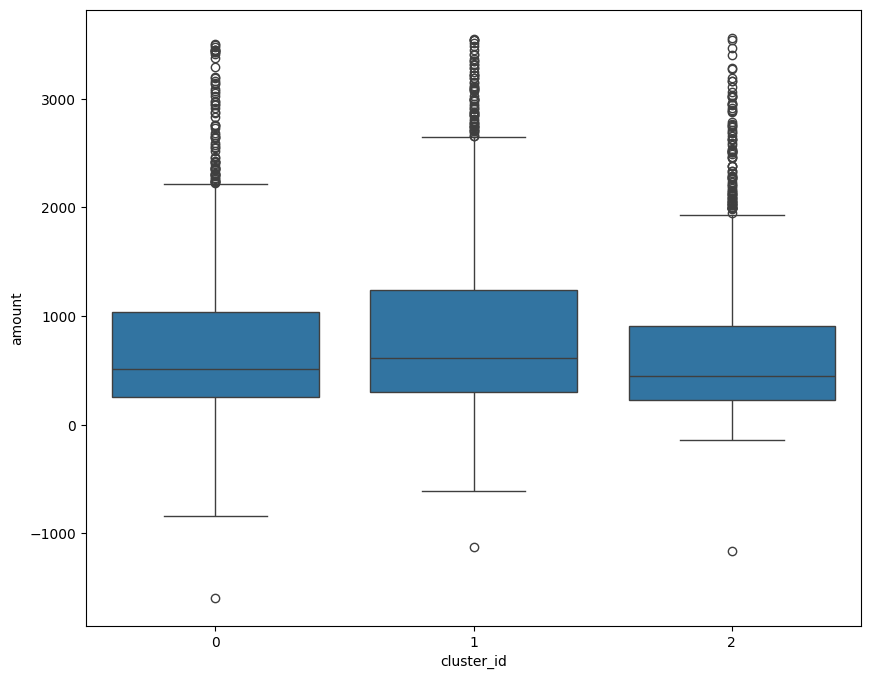

In [38]:
sns.boxplot(x='cluster_id', y='amount', data=filtered_data)


<Axes: xlabel='cluster_id', ylabel='freequency'>

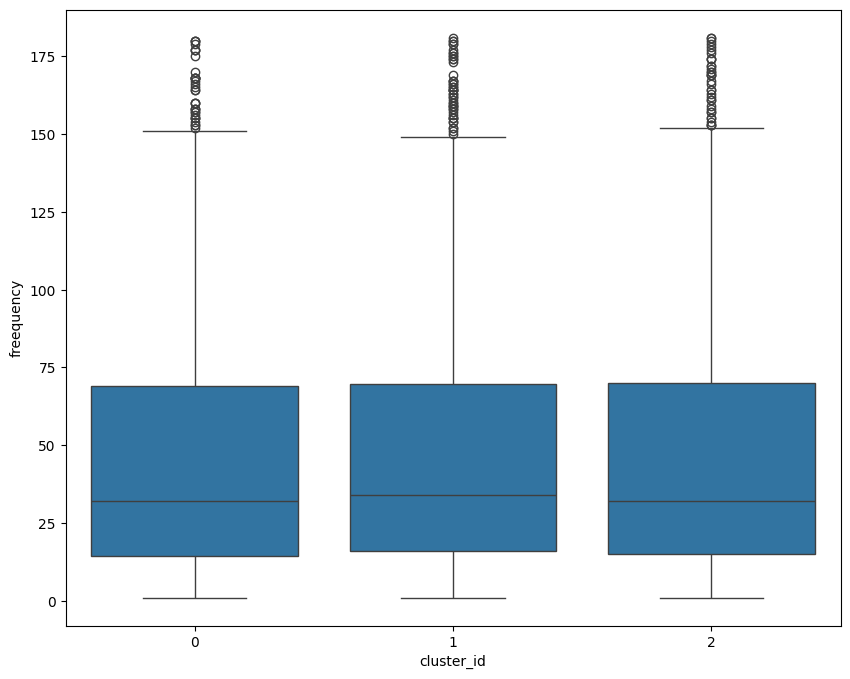

In [39]:
sns.boxplot(x="cluster_id",y ="freequency",data = filtered_data)

<Axes: xlabel='cluster_id', ylabel='datediff'>

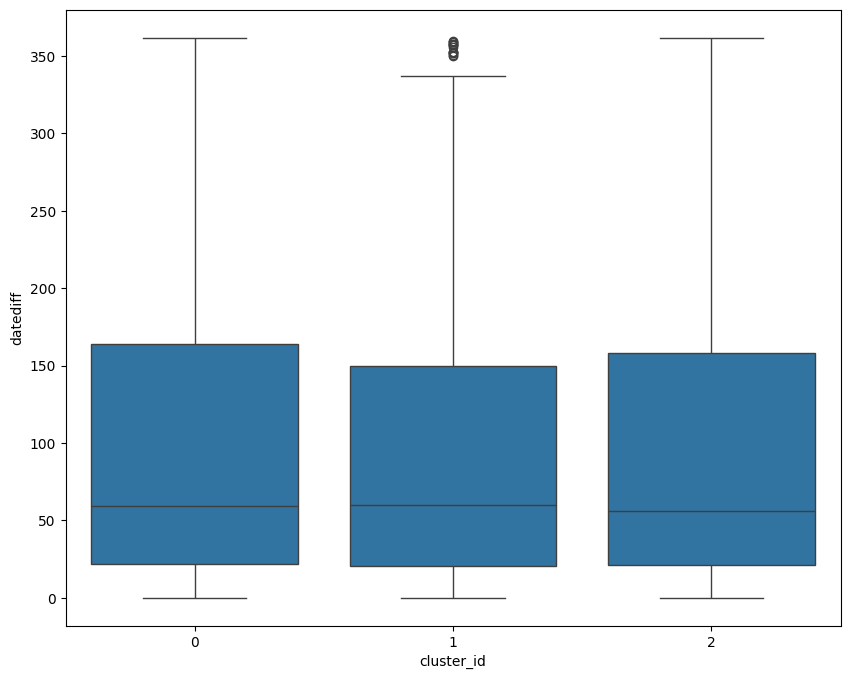

In [40]:
sns.boxplot(x="cluster_id",y ="datediff",data = filtered_data)

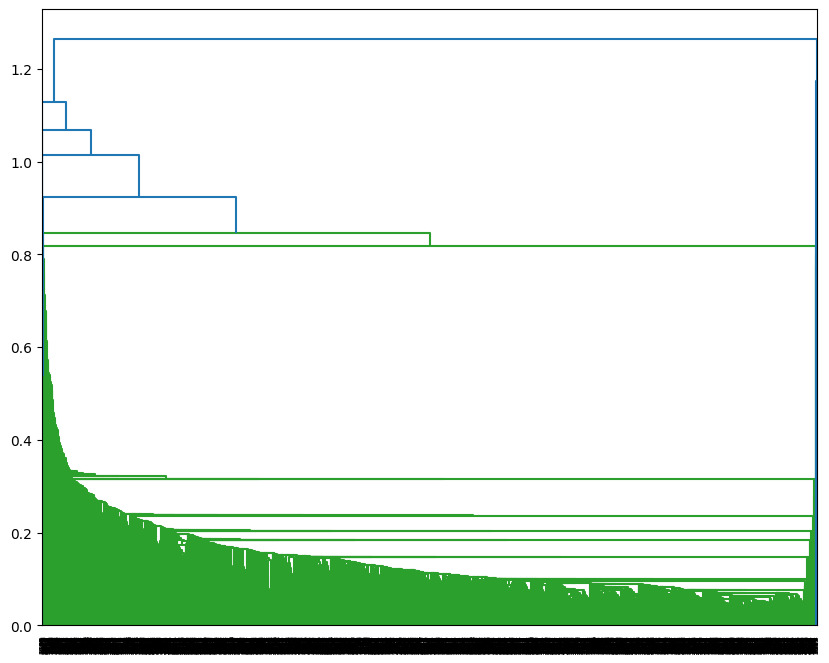

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
mergings = linkage(df_sc,method="single", metric='euclidean')
dendrogram(mergings)
plt.show()